## Imports and Data Collection

In [7]:


import pandas as pd
import numpy as np
from finta import TA
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

In [15]:
import yfinance as yf
# Define some variables
num_days = 365
interval = '1d'
stock_symbol = 'AAPL'

# List of symbols for technical indicators
INDICATORS = ['RSI', 'MACD', 'STOCH','ADL', 'ATR', 'MOM', 'MFI', 'ROC', 'OBV', 'CCI', 'EMV', 'VORTEX']


In [16]:
import datetime
# Define start and end date 
start = (datetime.date.today() - datetime.timedelta(num_days))
end = datetime.datetime.today()

In [19]:
appl_df = yf.download(stock_symbol, start=start, end=end)
appl_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-07,163.360001,165.020004,159.039993,159.300003,158.340820,96418800
2022-03-08,158.820007,162.880005,155.800003,157.440002,156.492004,131148300
2022-03-09,161.479996,163.410004,159.410004,162.949997,161.968842,91454900
2022-03-10,160.199997,160.389999,155.979996,158.520004,157.565506,105342000
2022-03-11,158.929993,159.279999,154.500000,154.729996,153.798325,96970100


In [20]:
appl_df.rename(columns={"Close": 'close', "High": 'high', "Low": 'low', 'Volume': 'volume', 'Open': 'open'}, inplace=True)
appl_df.head()

,open,high,low,close,Adj Close,volume
Date,,,,,,
2022-03-07,163.360001,165.020004,159.039993,159.300003,158.340820,96418800
2022-03-08,158.820007,162.880005,155.800003,157.440002,156.492004,131148300
2022-03-09,161.479996,163.410004,159.410004,162.949997,161.968842,91454900
2022-03-10,160.199997,160.389999,155.979996,158.520004,157.565506,105342000
2022-03-11,158.929993,159.279999,154.500000,154.729996,153.798325,96970100


<AxesSubplot:xlabel='Date'>

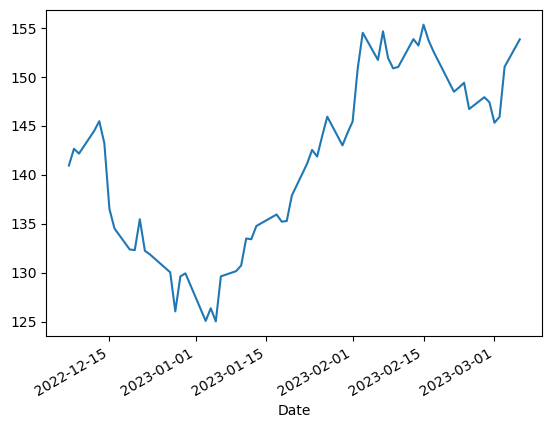

In [22]:
## slicing the data to last 60 day

appl_df_recent = appl_df.iloc[-60:]
appl_df_recent['close'].plot()

# Data Processing and Feature Engieering

<AxesSubplot:xlabel='Date'>

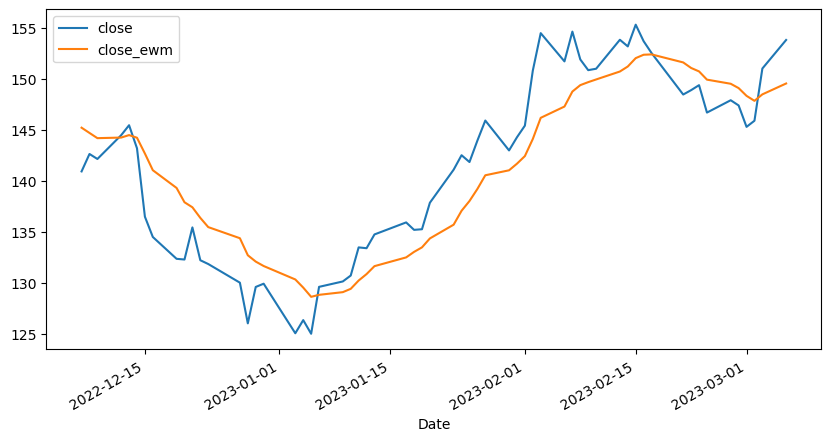

In [30]:

# Exponentially smooth the closing price data
appl_df['close_ewm'] = appl_df['close'].ewm(alpha=0.2).mean()

appl_df_recent = appl_df.iloc[-60:]

# Plot the original and smoothed closing price data
appl_df_recent[['close', 'close_ewm']].plot(figsize=(10, 5))

In [34]:
import talib as ta
# Compute the SMA indicator for a 20-day period
appl_df['SMA_20'] = ta.SMA(appl_df['close'], timeperiod=20)

# Compute the RSI indicator for a 14-day period
appl_df['RSI_14'] = ta.RSI(appl_df['close'], timeperiod=14)

# Compute the moving averages 
appl_df['ema50'] = appl_df['close']/ appl_df['close'].ewm(50).mean()